<h2><center>Power Analysis Using Python</center></h2>

Topics in this piece:

* Statistical power is the probability of a hypothesis test of finding an effect if there is an effect to be found.
* A power analysis can be used to estimate the minimum sample size required for an experiment, given a desired significance level, effect size, and statistical power.
* How to calculate and plot power analysis for the Student’s t test in Python in order to effectively design an experiment.

<h3>Statistical Hypothesis Testing</h3>

A statistical hypothesis test makes an assumption about the outcome, called the null hypothesis.

For example, the null hypothesis for the Pearson’s correlation test is that there is no relationship between two variables. The null hypothesis for the Student’s t test is that there is no difference between the means of two populations.

The test is often interpreted using a p-value, which is the probability of observing the result given that the null hypothesis is true, not the reverse, as is often the case with misinterpretations.

* p-value (p): Probability of obtaining a result equal to or more extreme than was observed in the data.

In interpreting the p-value of a significance test, you must specify a significance level, often referred to as the Greek lower case letter alpha (a). A common value for the significance level is 5% written as 0.05.

The p-value is interested in the context of the chosen significance level. A result of a significance test is claimed to be “statistically significant” if the p-value is less than the significance level. This means that the null hypothesis (that there is no result) is rejected.

* p <= alpha: reject H0, different distribution.
* p > alpha: fail to reject H0, same distribution.

Where

* Significance level (alpha): Boundary for specifying a statistically significant finding when interpreting the p-value.

We can see that the p-value is just a probability and that in actuality the result may be different. The test could be wrong. Given the p-value, we could make an error in our interpretation.

* Type I Error: Incorrect rejection of a true null hypothesis or a false positive.
* Type II Error: Incorrect acceptance of a false null hypothesis or a false negative.

In this context, we can think of the significance level as the probability of rejecting the null hypothesis if it were true. That is the probability of making a Type I Error or a false positive.


<h3>What is Statistical Power</h3>

Statistical power, or the power of a hypothesis test is the probability that the test correctly rejects the null hypothesis.

That is, the probability of a true positive result. It is only useful when the null hypothesis is rejected.

<b>The higher the statistical power for a given experiment</b>, the lower the probability of making a Type II (false negative) error. <b>That is the higher the probability of detecting an effect when there is an effect</b>. In fact, <b>the power is precisely the inverse of the probability of a Type II error</b>

<font color = 'blue'>Power = 1 - Type II Error</font><br>
<font color = 'blue'>Pr(True Positive) = 1 - Pr(False Negative)</font>

More intuitively, the statistical power can be thought of as the probability of accepting an alternative hypothesis, when the alternative hypothesis is true.

<b>It is common to design experiments with a statistical power of 80% or better</b>, e.g. 0.80. This means a 20% probability of encountering a Type II area. This different to the 5% likelihood of encountering a Type I error for the standard value for the significance level.


<h3>Power Analysis</h3>

Statistical power is one piece in a puzzle that has four related parts; they are:

* Effect Size. The quantified magnitude of a result present in the population. Effect size is calculated using a specific statistical measure, such as Pearson’s correlation coefficient for the relationship between variables or Cohen’s d for the difference between groups.
* Sample Size. The number of observations in the sample.
* Significance. The significance level used in the statistical test, e.g. alpha. Often set to 5% or 0.05.
* Statistical Power. The probability of accepting the alternative hypothesis if it is true.

A power analysis involves estimating one of these four parameters given values for three other parameters. This is a powerful tool in both the design and in the analysis of experiments that we wish to interpret using statistical hypothesis tests.

Perhaps the most common use of a power analysis is in the estimation of the minimum sample size required for an experiment.

As a practitioner, we can start with sensible defaults for some parameters, such as a significance level of 0.05 and a power level of 0.80. We can then estimate a desirable minimum effect size, specific to the experiment being performed. A power analysis can then be used to estimate the minimum sample size required.

In addition, multiple power analyses can be performed to provide a curve of one parameter against another, such as the change in the size of an effect in an experiment given changes to the sample size. More elaborate plots can be created varying three of the parameters. This is a useful tool for experimental design.

<h3>Student’s t Test Power Analysis</h3>

We can make the idea of statistical power and power analysis concrete with a worked example.

In this section, we will look at the Student’s t test, which is a statistical hypothesis test for comparing the means from two samples of Gaussian variables. The assumption, or null hypothesis, of the test is that the sample populations have the same mean, e.g. that there is no difference between the samples or that the samples are drawn from the same underlying population.

The test will calculate a p-value that can be interpreted as to whether the samples are the same (fail to reject the null hypothesis), or there is a statistically significant difference between the samples (reject the null hypothesis). <b>A common significance level for interpreting the p-value is 5% or 0.05</b>.

The size of the effect of comparing two groups can be quantified with an effect size measure. A common measure for comparing the difference in the mean from two groups is the Cohen’s d measure. It calculates a standard score that describes the difference in terms of the number of standard deviations that the means are different. <b>A large effect size for Cohen’s d is 0.80 or higher, as is commonly accepted when using the measure</b>.

We can use the default and <b>assume a minimum statistical power of 80% or 0.8</b>.

For a given experiment with these defaults, we may be interested in estimating a suitable sample size. That is, how many observations are required from each sample in order to at least detect an effect of 0.80 with an 80% chance of detecting the effect if it is true (20% of a Type II error) and a 5% chance of detecting an effect if there is no such effect (Type I error).

We can solve this using a power analysis.

The statsmodels library provides the TTestIndPower class for calculating a power analysis for the Student’s t test with independent samples. Of note is the TTestPower class that can perform the same analysis for the paired Student’s t test.

The function solve_power() can be used to calculate one of the four parameters in a power analysis. In our case, we are interested in calculating the sample size. We can use the function by providing the three pieces of information we know (alpha, effect, and power) and setting the size of argument we wish to calculate the answer of (nobs1) to “None“. This tells the function what to calculate.

A note on sample size: the function has an argument called ratio that is the ratio of the number of samples in one sample to the other. If both samples are expected to have the same number of observations, then the ratio is 1.0. If, for example, the second sample is expected to have half as many observations, then the ratio would be 0.5.

The TTestIndPower instance must be created, then we can call the solve_power() with our arguments to estimate the sample size for the experiment.

In [3]:
# estimate sample size via power analysis

from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power = power, nobs1 = None, ratio = 1, alpha = alpha)
print('Sample Size: %.3f' % result)



Sample Size: 25.525


Running the example calculates and prints the estimated number of samples for the experiment as 25. This would be a suggested minimum number of samples required to see an effect of the desired size.

We can go one step further and calculate power curves.

Power curves are line plots that show how the change in variables, such as effect size and sample size, impact the power of the statistical test.

The plot_power() function can be used to create power curves. The dependent variable (x-axis) must be specified by name in the ‘dep_var‘ argument. Arrays of values can then be specified for the sample size (nobs), effect size (effect_size), and significance (alpha) parameters. One or multiple curves will then be plotted showing the impact on statistical power.

For example, we can assume a significance of 0.05 (the default for the function) and explore the change in sample size between 5 and 100 with low, medium, and high effect sizes.

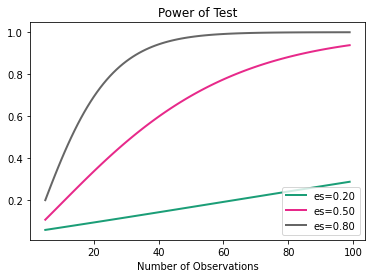

In [7]:
# calculate power curve for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower

# parameter for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))

# calculate power curve from multiple analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var = 'nobs', nobs = sample_sizes, effect_size = effect_sizes)
pyplot.show()

We can see that if we are interested in a large effect that a point of diminishing returns in terms of statistical power occurs at around 40-to-50 observations.

Usefully, statsmodels has classes to perform a power analysis with other statistical tests, such as the F-test, Z-test, and the Chi-Squared test.

<h3>Other Examples</h3>

<h3>Example 1</h3>

Consider a Student’s t-test, which is a statistical hypothesis test for comparing the means from two samples of Gaussian variables. In a pilot study with the two groups of variables, N1 = 4, Mean1 = 90, SD1 = 5; N2  = 4, Mean2 = 85, SD2 = 5. The assumption, or null hypothesis, of the test, is that the sample populations have the same mean. Since alpha is usually set to 0.05 and power to 0.80, the researcher primarily needs to be concerned with the sample size and the effect size. Let’s determine the sample size needed for the test in which a power of 80% is acceptable, with the significance level at 5% and the expected effect size to be found using the pilot study.

Import the relevant libraries. Calculate the effect size using Cohen’s d. The TTestIndPower function implements Statistical Power calculations for t-test for two independent samples. Similarly, there are functions for F-test, Z-test and Chi-squared test. Next, initialize the variables for power analysis. Then using the solve_power function, we can get the required missing variable, which is the sample size in this case.

In [2]:
# import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower
  
#calculation of effect size
# size of samples in pilot study
n1, n2 = 4, 4
  
# variance of samples in pilot study
s1, s2 = 5**2, 5**2
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
  
# means of the samples
u1, u2 = 90, 85
  
# calculate the effect size
d = (u1 - u2) / s
print(f'Effect size: {d}')
  
# factors for power analysis
alpha = 0.05
power = 0.8
  
# perform power analysis to find sample size 
# for given effect 
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))

Effect size: 1.0
Sample size/Number needed in each group: 16.715


So, the suggested minimum number of samples in each group required is 17 to have a significant p-value in the t-test. If we proceed and use an inferential t‐test before the power analysis, we may find a non‐significant p‐value even though there is a large effect, likely due to the small sample size (4).

<h3>Example 2</h3>

Test the power of a specific proposed sample size. 

In [3]:
from statsmodels.stats.power import TTestPower
  
  
power = TTestPower()
n_test = power.solve_power(nobs=40, effect_size = 0.5,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 0.869


This tells us that a minimum sample size of 40 would result in a power of 0.87. 

<h3>Example 3 Power Curve</h3>

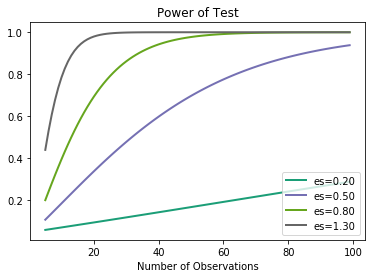

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
  
  
# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

Citation

https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/
https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/